# 📝 Example Usage of CharMark

This notebook shows how to use **CharMark** to extract character-level Markov features from transcripts,
run unsupervised exploration, perform statistical testing, and validate with a Lasso logistic regression.



In [ ]:
# Uncomment to install in Colab or a fresh environment
# !pip install numpy pandas scipy scikit-learn matplotlib networkx

In [6]:
# ⬇️ Cell 1: Clone CharMark's GitHub repo
!git clone https://github.com/jkevin2010/charmark-biomarker-discovery.git
%cd charmark-biomarker-discovery


Cloning into 'charmark-biomarker-discovery'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 13.77 KiB | 6.88 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/charmark-biomarker-discovery


In [7]:
# ⬇️ Cell 2: Install requirements
!pip install -q -r requirements.txt

In [8]:
# ⬇️ Cell 3: Import the CharMark class
from charmark import CharMark
import pandas as pd
print("✅ CharMark imported successfully!")

✅ CharMark imported successfully!


In [9]:
# ⬇️ Cell 4: Create a small balanced toy dataset
transcripts = [
    "hello world this is a test",
    "the quick brown fox jumps over the lazy dog",
    "another sample of speech for analysis",
    "final example sentence representing dementia"
]
labels = [0, 0, 1, 1]
df = pd.DataFrame({"transcript": transcripts, "label": labels})
df.to_csv("sample.csv", index=False)
df.head()

,transcript,label
0,hello world this is a test,0
1,the quick brown fox jumps over the lazy dog,0
2,another sample of speech for analysis,1
3,final example sentence representing dementia,1


In [10]:
# ⬇️ Cell 5: Run CharMark pipeline
cm = CharMark("sample.csv", alpha=0.01,
              transcript_col="transcript", label_col="label")
X, y = cm.fit_transform()
print(f"Feature matrix shape: {X.shape}")
print(f"KS on space char: {cm.ks_test()[' ']}")

# Try/except around Lasso in case of small sample fallback
try:
    auc = cm.lasso_validation(cv=3)
    print(f"Lasso logistic regression AUC = {auc:.3f}")
except Exception as e:
    print("⚠️ Skipping Lasso CV:", e)


Feature matrix shape: (4, 27)
KS on space char: {'ks_stat': np.float64(1.0), 'p_value': np.float64(0.3333333333333333)}
⚠️ Skipping Lasso CV: n_splits=3 cannot be greater than the number of members in each class.


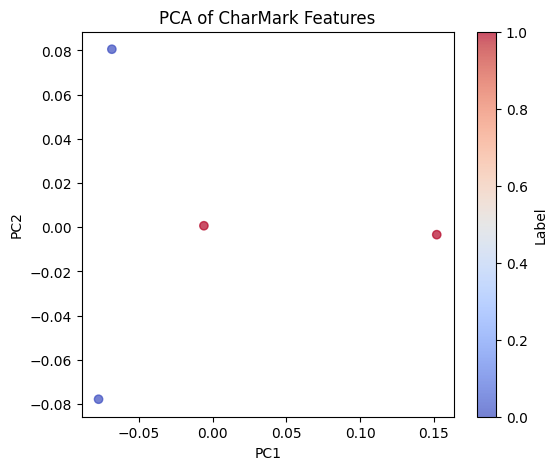

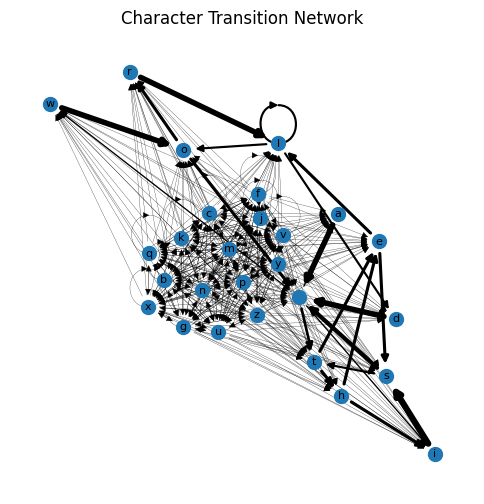

In [11]:
# ⬇️ Cell 6: Visualizations
cm.plot_pca(X, y)          # PCA scatter
cm.plot_network(0)         # Transition network for sample 0